In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/players_stats.csv')
df.head()

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths
0,Champions Tour 2024: Masters Madrid,Playoffs,Upper Semifinals,cauanzin,LOUD,breach,43,1.06,253,1.06,...,0.12,25%,NaN,0/2,18,35,33,12,1,5
1,Champions Tour 2024: Masters Madrid,Playoffs,Upper Semifinals,cauanzin,LOUD,sova,26,0.98,185,0.94,...,0.00,22%,NaN,NaN,16,16,17,4,3,0
2,Champions Tour 2024: Masters Madrid,Playoffs,Upper Semifinals,cauanzin,LOUD,"breach, sova",69,1.04,230,1.02,...,0.07,25%,NaN,0/2,18,51,50,16,4,5
3,Champions Tour 2024: Masters Madrid,Playoffs,Upper Semifinals,tuyz,LOUD,harbor,26,1.21,199,1.33,...,0.00,30%,NaN,0/3,20,20,15,10,2,0
4,Champions Tour 2024: Masters Madrid,Playoffs,Upper Semifinals,tuyz,LOUD,omen,43,1.10,188,1.24,...,0.07,25%,13%,1/8,20,31,25,12,1,3


In [3]:
df.drop(columns=['Tournament', 'Stage', 'Match Type'], inplace=True)

In [4]:
participating_teams = ['FNATIC', 'Bilibili Gaming', 'DRX', 'KRÜ Esports', 'Gen.G', 'Sentinels', 'FunPlus Phoenix', 'Team Heretics', 'Leviatán', 'Talon Esports', 'Team Vitality', 'Trace Esports', 'EDward Gaming', 'FUT Esports', 'G2 Esports', 'Paper Rex']

participating_teams_abb = ['FNC', 'BLG', 'DRX', 'KRU', 'GEN', 'SEN', 'FPX', 'TH', 'LEV', 'TLN', 'VIT', 'TE', 'EDG', 'FUT', 'G2', 'PRX']

df_teams = pd.DataFrame(columns=['Team', 'Abbreviation'])
df_teams['Team'] = participating_teams
df_teams['Abbreviation'] = participating_teams_abb

In [5]:
df_participating_teams = pd.DataFrame()
df_participating_teams = df[df['Teams'].isin(participating_teams)]

# df_participating_teams.iloc[:, 1]
df_participating_teams.insert(2, 'Abbreviation', df_participating_teams['Teams'].map(df_teams.set_index('Team')['Abbreviation']))
df_participating_teams.tail()


,Player,Teams,Abbreviation,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage Per Round,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths
13670,Leo,FNATIC,FNC,"fade, skye, sova",88,1.05,187,1.13,77%,126.0,...,0.05,22%,NaN,0/11,24,59,52,29,6,4
13671,Derke,FNATIC,FNC,jett,18,1.13,255,1.31,72%,160.0,...,0.22,47%,NaN,NaN,17,17,13,2,5,4
13672,Derke,FNATIC,FNC,raze,70,0.73,166,0.73,60%,108.0,...,0.19,22%,NaN,0/3,15,40,55,5,12,13
13673,Derke,FNATIC,FNC,"jett, raze",88,0.83,188,0.84,63%,119.0,...,0.19,27%,NaN,0/3,17,57,68,7,17,17
13674,Boaster,FNATIC,FNC,omen,88,1.01,200,1.03,70%,135.0,...,0.10,28%,NaN,0/12,20,64,62,38,6,9


In [6]:
df_participating_teams.dtypes

Player                             object
Teams                              object
Abbreviation                       object
Agents                             object
Rounds Played                       int64
Rating                            float64
Average Combat Score                int64
Kills:Deaths                      float64
Kill, Assist, Trade, Survive %     object
Average Damage Per Round          float64
Kills Per Round                   float64
Assists Per Round                 float64
First Kills Per Round             float64
First Deaths Per Round            float64
Headshot %                         object
Clutch Success %                   object
Clutches (won/played)              object
Maximum Kills in a Single Map       int64
Kills                               int64
Deaths                              int64
Assists                             int64
First Kills                         int64
First Deaths                        int64
dtype: object

In [7]:
df_participating_teams['Headshot %'] = df_participating_teams['Headshot %'].str.replace('%', '').astype(float)
df.dtypes

C:\Users\user\AppData\Local\Temp\ipykernel_19804\1009028722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_participating_teams['Headshot %'] = df_participating_teams['Headshot %'].str.replace('%', '').astype(float)


Player                             object
Teams                              object
Agents                             object
Rounds Played                       int64
Rating                            float64
Average Combat Score                int64
Kills:Deaths                      float64
Kill, Assist, Trade, Survive %     object
Average Damage Per Round          float64
Kills Per Round                   float64
Assists Per Round                 float64
First Kills Per Round             float64
First Deaths Per Round            float64
Headshot %                         object
Clutch Success %                   object
Clutches (won/played)              object
Maximum Kills in a Single Map       int64
Kills                               int64
Deaths                              int64
Assists                             int64
First Kills                         int64
First Deaths                        int64
dtype: object

In [8]:
df_top_players = df_participating_teams.groupby(['Player', 'Teams', 'Abbreviation']).agg({'Rounds Played': 'sum', 'Rating': 'mean', 'Average Combat Score': 'mean', 'Kills:Deaths': 'mean', 'Average Damage Per Round': 'mean', 'Headshot %': 'mean', 'Kills': 'sum', 'Deaths': 'sum', 'Assists': 'sum', 'First Kills': 'sum' }).reset_index()

# df_top_players['Rating'] = df_top_players['Rating'].round(2)

In [9]:
df_top_players.sort_values(by='Rating', ascending=False, inplace=True)
df_top_players 

# = df_top_players.head(10)
# df_top_players

,Player,Teams,Abbreviation,Rounds Played,Rating,Average Combat Score,Kills:Deaths,Average Damage Per Round,Headshot %,Kills,Deaths,Assists,First Kills
60,aspas,Leviatán,LEV,5380,1.284478,262.415584,1.553636,171.636364,29.940299,4985,3468,986,1001
55,Wo0t,Team Heretics,TH,5154,1.145082,227.360465,1.198488,149.593023,35.409836,4025,3599,1512,820
34,Leo,FNATIC,FNC,3436,1.136000,201.079365,1.309048,132.301587,25.800000,2528,1984,1236,152
50,Sayf,Team Vitality,VIT,4568,1.124375,226.387500,1.268625,146.237500,29.350000,3752,3096,996,616
14,Chronicle,FNATIC,FNC,5060,1.123718,206.186813,1.189890,137.274725,24.589744,3626,3214,2014,463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,YOU,Trace Esports,TE,2769,NaN,190.200000,1.059556,NaN,NaN,1822,1819,867,0
57,Yosemite,Bilibili Gaming,BLG,3372,NaN,208.528302,1.049245,141.074074,NaN,2479,2314,968,128
68,heybay,Trace Esports,TE,4845,NaN,178.759036,0.906024,104.733333,NaN,3011,3347,2026,120
79,nephh,Bilibili Gaming,BLG,1480,NaN,204.448276,1.015862,129.241379,NaN,1036,1064,680,132


In [10]:
df_top_players['Ingame ID'] = df_top_players['Abbreviation'] + ' ' + df_top_players['Player']
df_top_players

,Player,Teams,Abbreviation,Rounds Played,Rating,Average Combat Score,Kills:Deaths,Average Damage Per Round,Headshot %,Kills,Deaths,Assists,First Kills,Ingame ID
60,aspas,Leviatán,LEV,5380,1.284478,262.415584,1.553636,171.636364,29.940299,4985,3468,986,1001,LEV aspas
55,Wo0t,Team Heretics,TH,5154,1.145082,227.360465,1.198488,149.593023,35.409836,4025,3599,1512,820,TH Wo0t
34,Leo,FNATIC,FNC,3436,1.136000,201.079365,1.309048,132.301587,25.800000,2528,1984,1236,152,FNC Leo
50,Sayf,Team Vitality,VIT,4568,1.124375,226.387500,1.268625,146.237500,29.350000,3752,3096,996,616,VIT Sayf
14,Chronicle,FNATIC,FNC,5060,1.123718,206.186813,1.189890,137.274725,24.589744,3626,3214,2014,463,FNC Chronicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,YOU,Trace Esports,TE,2769,NaN,190.200000,1.059556,NaN,NaN,1822,1819,867,0,TE YOU
57,Yosemite,Bilibili Gaming,BLG,3372,NaN,208.528302,1.049245,141.074074,NaN,2479,2314,968,128,BLG Yosemite
68,heybay,Trace Esports,TE,4845,NaN,178.759036,0.906024,104.733333,NaN,3011,3347,2026,120,TE heybay
79,nephh,Bilibili Gaming,BLG,1480,NaN,204.448276,1.015862,129.241379,NaN,1036,1064,680,132,BLG nephh


In [15]:
best_players = []

features = [
    'Rounds Played',
    'Rating', 
    'Average Combat Score', 
    'Kills:Deaths', 
    'Average Damage Per Round', 
    'Headshot %', 
    'Kills', 
    'Deaths', 
    'Assists', 
    'First Kills'
]

# Identificar el mejor jugador en cada característica
for feature in features:
    best_player = df_top_players.loc[df_top_players[feature].idxmax()]
    best_players.append({
        'Characteristic': feature,
        'Player': best_player['Ingame ID'],
        'Value': best_player[feature].round(2)
    })

# Convertir la lista de diccionarios en un DataFrame para una mejor visualización
best_players_df = pd.DataFrame(best_players)
best_players_df


,Characteristic,Player,Value
0,Rounds Played,GEN Lakia,8900.00
1,Rating,LEV aspas,1.28
2,Average Combat Score,EDG ZmjjKK,264.74
3,Kills:Deaths,LEV aspas,1.55
4,Average Damage Per Round,TLN primmie,172.43
5,Headshot %,TLN primmie,46.07
6,Kills,GEN t3xture,7277.00
7,Deaths,GEN Meteor,6170.00
8,Assists,GEN Munchkin,3754.00
9,First Kills,GEN t3xture,1674.00


Los mejores jugadores en cada característica de desempeño durante la temporada regular de Valorant 2024 son los siguientes:

1. **Rounds Played**: GEN Lakia con 8900 rondas jugadas.
2. **Rating**: LEV aspas con un rating medio de 1.28 por partido.
3. **Average Combat Score**: EDG ZmjjKK con un promedio de 264.74 puntos de combate por partido.
4. **Kills:Deaths**: LEV aspas con un ratio de 1.55 por partido.
5. **Average Damage Per Round**: TLN primmie con un promedio de 172.43 de daño por ronda.
6. **Headshot %**: TLN primmie con un porcentaje de headshots de 46.07%.
7. **Kills**: GEN t3xture con 7277 eliminaciones en total.
8. **Deaths**: GEN Meteor con 6170 muertes en total.
9. **Assists**: GEN Munchkin con 3754 asistencias en total.
10. **First Kills**: GEN t3xture con 1674 primeras eliminaciones en total.

Considerando esta información, los tres jugadores más importantes y a quienes hay que estar pendientes en el mundial son:

1. **LEV aspas**: Destacado tanto en el rating como en el ratio de kills:deaths, aspas es un jugador clave con un desempeño consistente y un impacto significativo en el juego.
2. **GEN t3xture**: Liderando en eliminaciones y primeras eliminaciones, t3xture es un jugador agresivo y efectivo que puede cambiar el curso de las partidas a favor de su equipo.
3. **TLN primmie**: Puede ser una de las sorpresas del torneo, con el mejor promedio de daño por ronda y el porcentaje más alto de headshots, primmie muestra habilidades excepcionales en precisión y daño, lo que lo convierte en un jugador crucial para su equipo.


Estos jugadores han demostrado un rendimiento sobresaliente durante la temporada y serán figuras clave en el próximo mundial de Valorant Champions 2024.

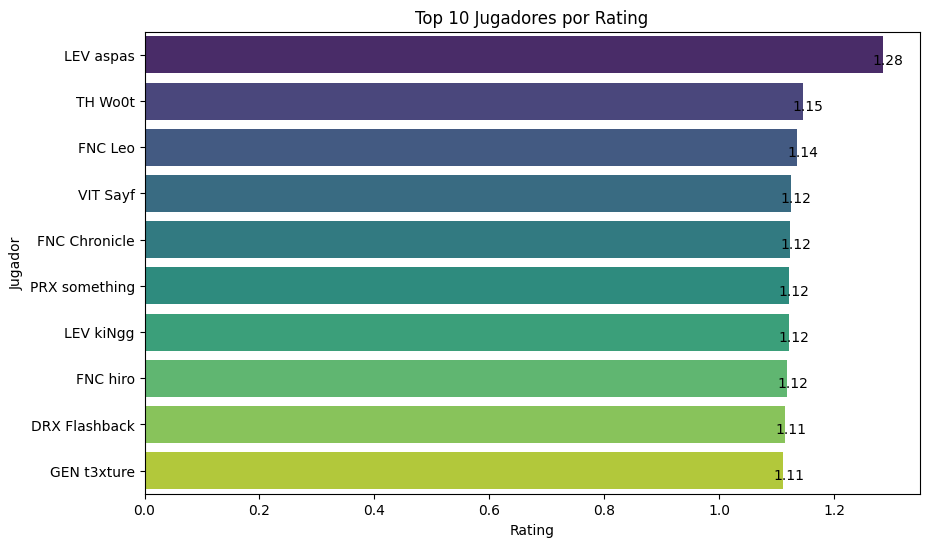

In [12]:
df_top_players.sort_values(by='Rating', ascending=False, inplace=True)
df_tp_by_rating = df_top_players.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Ingame ID', data=df_tp_by_rating, palette='viridis')
plt.title('Top 10 Jugadores por Rating')
plt.xlabel('Rating')
plt.ylabel('Jugador')

for p in plt.gca().patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height() / 2. + 0.2, '{:1.2f}'.format(width), ha="center")

plt.show()

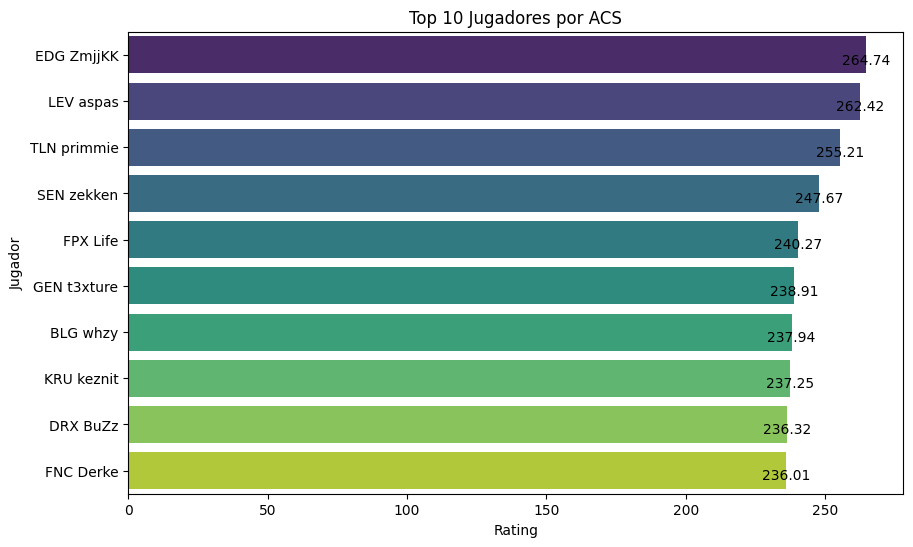

In [13]:
df_top_players.sort_values(by='Average Combat Score', ascending=False, inplace=True)
df_tp_by_acs = df_top_players.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Average Combat Score', y='Ingame ID', data=df_tp_by_acs, palette='viridis')
plt.title('Top 10 Jugadores por ACS')
plt.xlabel('Rating')
plt.ylabel('Jugador')

for p in plt.gca().patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height() / 2. + 0.2, '{:1.2f}'.format(width), ha="center")

plt.show()

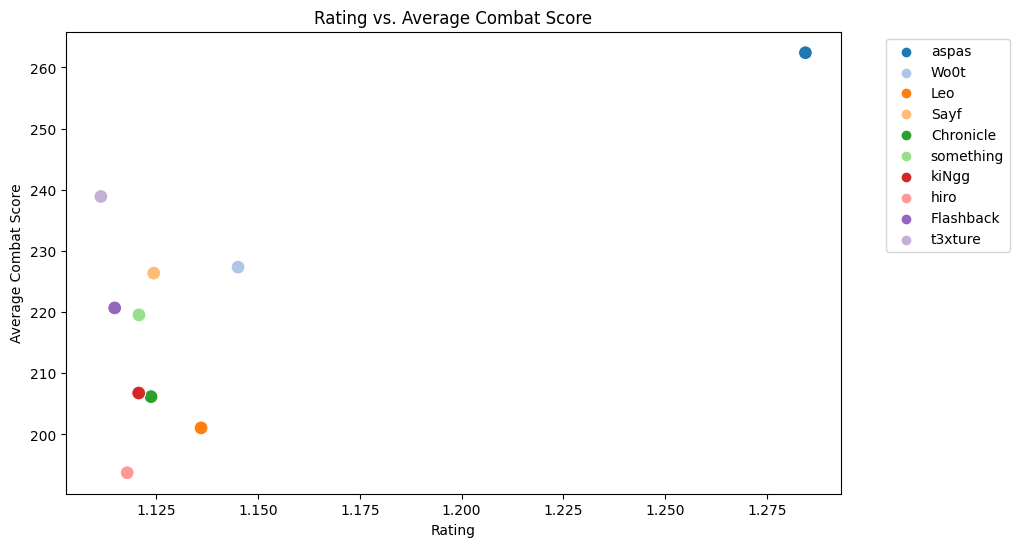

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Average Combat Score', hue='Player', data=df_tp_by_rating, palette='tab20', s=100)
plt.title('Rating vs. Average Combat Score')
plt.xlabel('Rating')
plt.ylabel('Average Combat Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()